In [21]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

In [22]:
plt.rcParams.update({'font.size': 18})

In [23]:
df = pd.read_csv('AEP_hourly_Sep2012.csv', sep=',')

df

,datetime,energy
0,2012-09-01 01:00:00,15154.0
1,2012-09-01 02:00:00,14224.0
2,2012-09-01 03:00:00,13696.0
3,2012-09-01 04:00:00,13221.0
4,2012-09-01 05:00:00,13130.0
...,...,...
691,2012-09-29 20:00:00,12964.0
692,2012-09-29 21:00:00,13065.0
693,2012-09-29 22:00:00,12793.0
694,2012-09-29 23:00:00,12104.0


In [24]:
df['energy'] = df['energy']/100

In [28]:
df.index = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')


In [29]:
df

,datetime,energy
datetime,,
2012-09-01 01:00:00,2012-09-01 01:00:00,151.54
2012-09-01 02:00:00,2012-09-01 02:00:00,142.24
2012-09-01 03:00:00,2012-09-01 03:00:00,136.96
2012-09-01 04:00:00,2012-09-01 04:00:00,132.21
2012-09-01 05:00:00,2012-09-01 05:00:00,131.30
...,...,...
2012-09-29 20:00:00,2012-09-29 20:00:00,129.64
2012-09-29 21:00:00,2012-09-29 21:00:00,130.65
2012-09-29 22:00:00,2012-09-29 22:00:00,127.93


In [30]:
# (1 day = 24 hours, 1 week = 168 hours)
period01=24
period02=168

In [31]:
T=len(df['energy'])
time = np.arange(1,T+1)

In [33]:
omega01 = 2*np.pi/period01
s1 = np.sin(omega01*time)
c1 = np.cos(omega01*time)

In [35]:
omega02 = 2*np.pi/period02
s2 = np.sin(omega02*time)
c2 = np.cos(omega02*time)

In [36]:
regressors = np.column_stack((s1,c1,s2,c2))

In [37]:
regressors

array([[ 2.58819045e-01,  9.65925826e-01,  3.73911943e-02,
         9.99300705e-01],
       [ 5.00000000e-01,  8.66025404e-01,  7.47300936e-02,
         9.97203797e-01],
       [ 7.07106781e-01,  7.07106781e-01,  1.11964476e-01,
         9.93712210e-01],
       ...,
       [-5.00000000e-01,  8.66025404e-01,  7.33051872e-01,
         6.80172738e-01],
       [-2.58819045e-01,  9.65925826e-01,  7.57971723e-01,
         6.52287411e-01],
       [-2.84192335e-14,  1.00000000e+00,  7.81831482e-01,
         6.23489802e-01]])

In [38]:
regressors_one = sm.add_constant(regressors)

In [39]:
model = sm.OLS(df['energy'],regressors_one)
results = model.fit()

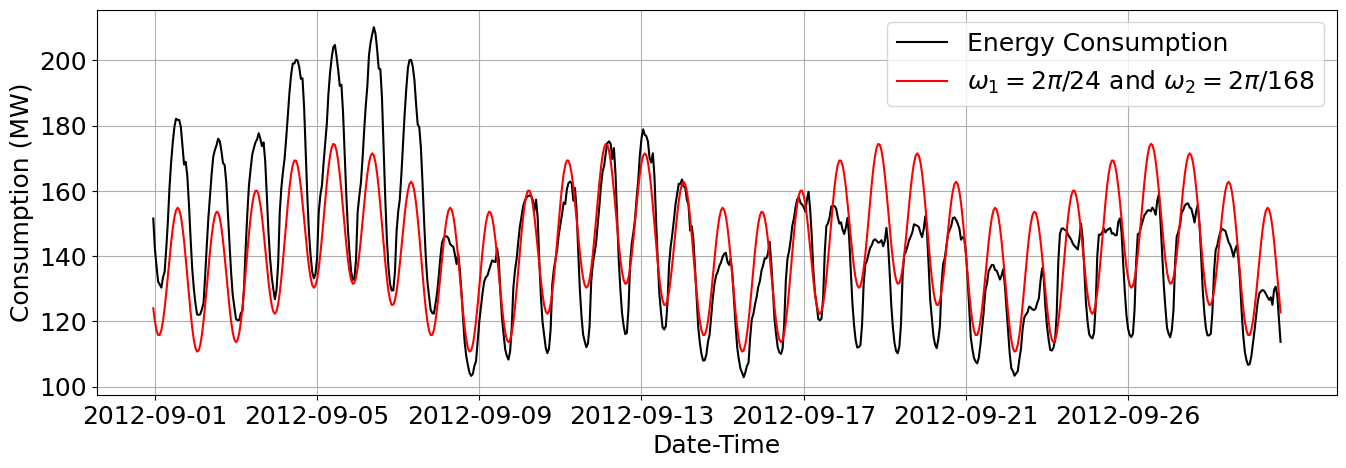

In [44]:
plt.figure(figsize=(16,5),dpi=100)

plt.plot(df.index, df['energy'], color='k', \
    label ='Energy Consumption')

plt.plot(df.index,results.fittedvalues, color = 'red', \
    label = '$\omega_{1} = 2\pi/24$ and $\omega_{2} = 2\pi/168$')

plt.gca().set(xlabel='Date-Time', \
    ylabel='Consumption (MW)')
plt.xticks(df.index[np.arange(1,len(df)+1, 100)])
plt.legend()
plt.grid()

# show the plot
plt.show()